In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

General Investigation of Product Trends

In [21]:
directory = "/Users/johannesheyl/Desktop/Facebook_Analytics_Academy/"
df = pd.read_csv(directory + "merged_dataset.csv")
df.head()


,Unnamed: 0,user_id,country,age,gender,start_date,ds1,ds2
0,0,9541124,DK,22,male,2018-05-05,NaN,2020-10-25
1,1,5946065,US,15,male,2018-01-24,2020-03-08,NaN
2,2,4180986,US,32,female,2018-12-17,NaN,NaN
3,3,5533917,US,70,male,2018-03-07,2020-01-11,2020-08-20
4,4,5533917,US,70,male,2018-03-07,2020-02-13,2020-08-20


In [22]:
df1 = df[df["ds1"].notna()]
df1["ds1"] = pd.to_datetime(df1["ds1"])
df1_counts = df1.groupby(df1['ds1'].dt.date).size().reset_index(name='Product 1')

df2 = df[df["ds2"].notna()]
df2["ds2"] = pd.to_datetime(df2["ds2"])
df2_counts = df2.groupby(df2['ds2'].dt.date).size().reset_index(name='Product 2')



<ipython-input-22-512bd5afb933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ds1"] = pd.to_datetime(df1["ds1"])
<ipython-input-22-512bd5afb933>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ds2"] = pd.to_datetime(df2["ds2"])


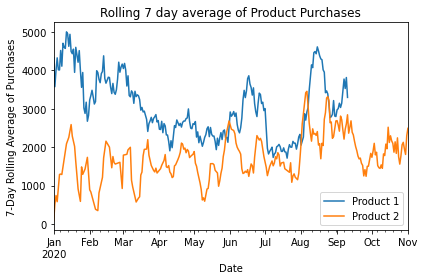

In [23]:
fig, ax = plt.subplots()

df1_counts["ds1"] = pd.to_datetime(df1_counts['ds1'])
temp_df1_counts = df1_counts.groupby(df1_counts['ds1'].dt.date).size().reset_index()
df1_counts.set_index("ds1", inplace = True)
df1_counts.rolling("7D").mean().plot(ax = ax)

df2_counts["ds2"] = pd.to_datetime(df2_counts['ds2'])
temp_df2_counts = df2_counts.groupby(df2_counts['ds2'].dt.date).size()
df2_counts.set_index("ds2", inplace = True)
df2_counts.rolling("7D").mean().plot(ax = ax)


plt.title("Rolling 7 day average of Product Purchases")
plt.xlabel("Date")
plt.ylabel("7-Day Rolling Average of Purchases")
plt.tight_layout()


Investigating Age Trends

In [24]:
age_brackets = []
for i in df1.age:
    if i <= 18:
        age_brackets.append("13-18")
    elif 18 < i < 30:
        age_brackets.append("19-30")
    elif 30 <= i < 40:
        age_brackets.append("30-40")
    elif 40 <= i < 50:
        age_brackets.append("40-50")
    elif 50 <= i < 60:
        age_brackets.append("50-60")
    elif 60 <= i < 70:
        age_brackets.append("60-70")
    else: 
        age_brackets.append("70+")

df1["age_bracket"] = age_brackets
 

<ipython-input-24-05ef87d79a56>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["age_bracket"] = age_brackets


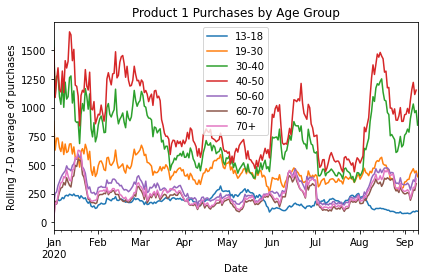

In [25]:
fig, ax = plt.subplots()
for i in np.unique(df1["age_bracket"].values):
    temp_df = df1[df1["age_bracket"] == i]
    temp_df_counts = temp_df.groupby(temp_df['ds1'].dt.date).size().reset_index(name=i)
    temp_df_counts["ds1"] = pd.to_datetime(temp_df_counts['ds1'])
    temp_df_counts.set_index("ds1", inplace = True)
    #temp_df_counts.rolling("7D").plot(x = "ds1", y = i, ax = ax)
    temp_df_counts.rolling("7D").mean().plot(ax = ax)

plt.title("Product 1 Purchases by Age Group")
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Rolling 7-D average of purchases")
plt.tight_layout()

In [26]:
age_brackets = []
for i in df2.age:
    if i <= 18:
        age_brackets.append("13-18")
    elif 18 < i < 30:
        age_brackets.append("19-30")
    elif 30 <= i < 40:
        age_brackets.append("30-40")
    elif 40 <= i < 50:
        age_brackets.append("40-50")
    elif 50 <= i < 60:
        age_brackets.append("50-60")
    elif 60 <= i < 70:
        age_brackets.append("60-70")
    else: 
        age_brackets.append("70+")


df2["age_bracket"] = age_brackets
   

<ipython-input-26-18af961785d8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["age_bracket"] = age_brackets


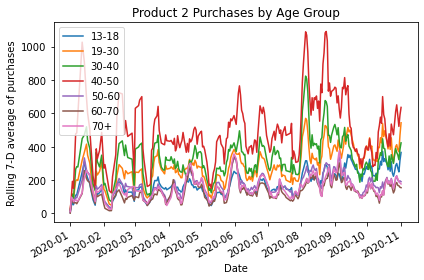

In [27]:
     
fig, ax1 = plt.subplots()
for i in np.unique(df2["age_bracket"].values):
    temp_df = df2[df2["age_bracket"] == i]
    temp_df_counts = temp_df.groupby(temp_df['ds2'].dt.date).size().reset_index(name=i)
    temp_df_counts["ds2"] = pd.to_datetime(temp_df_counts['ds2'])
    temp_df_counts.set_index("ds2", inplace = True)
    temp_df_counts.rolling("7D").mean().plot(ax = ax1)

plt.title("Product 2 Purchases by Age Group")
plt.xlabel("Date")
plt.ylabel("Rolling 7-D average of purchases")
plt.tight_layout()

Investigating Breakdown by Gender

In [28]:

df1_male = df1[df1.gender == "male"]
df1_male_counts = df1_male.groupby(df1_male['ds1'].dt.date).size().reset_index(name='Male Product 1')

df1_female = df1[df1.gender == "female"]
df1_female_counts = df1_female.groupby(df1_female['ds1'].dt.date).size().reset_index(name='Female Product 1')

df1_unknown = df1[df1.gender == "unknown"]
df1_unknown_counts = df1_unknown.groupby(df1_unknown['ds1'].dt.date).size().reset_index(name='Unknown Product 1')

In [29]:
df2_male = df2[df2.gender == "male"]
df2_male_counts = df2_male.groupby(df2_male['ds2'].dt.date).size().reset_index(name='Male Product 2')

df2_female = df2[df2.gender == "female"]
df2_female_counts = df2_female.groupby(df2_female['ds2'].dt.date).size().reset_index(name='Female Product 2')

df2_unknown = df2[df2.gender == "unknown"]
df2_unknown_counts = df2_unknown.groupby(df2_unknown['ds2'].dt.date).size().reset_index(name='Unknown Product 2')

Text(0.5, 1.0, 'Product Purchases by Gender')

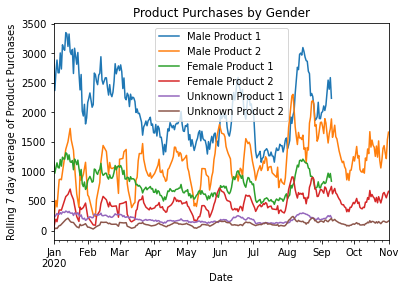

In [30]:
fig, ax = plt.subplots()

df1_male_counts["ds1"] = pd.to_datetime(df1_male_counts['ds1'])
temp_df1_counts = df1_male_counts.groupby(df1_male_counts['ds1'].dt.date).size().reset_index()
df1_male_counts.set_index("ds1", inplace = True)
df1_male_counts.rolling("7D").mean().plot(ax = ax)

df2_male_counts["ds2"] = pd.to_datetime(df2_male_counts['ds2'])
temp_df2_counts = df2_male_counts.groupby(df2_male_counts['ds2'].dt.date).size()
df2_male_counts.set_index("ds2", inplace = True)
df2_male_counts.rolling("7D").mean().plot(ax = ax)

df1_female_counts["ds1"] = pd.to_datetime(df1_female_counts['ds1'])
temp_df1_counts = df1_female_counts.groupby(df1_female_counts['ds1'].dt.date).size().reset_index()
df1_female_counts.set_index("ds1", inplace = True)
df1_female_counts.rolling("7D").mean().plot(ax = ax)

df2_female_counts["ds2"] = pd.to_datetime(df2_female_counts['ds2'])
temp_df2_counts = df2_female_counts.groupby(df2_female_counts['ds2'].dt.date).size().reset_index()
df2_female_counts.set_index("ds2", inplace = True)
df2_female_counts.rolling("7D").mean().plot(ax = ax)

df1_unknown_counts["ds1"] = pd.to_datetime(df1_unknown_counts['ds1'])
temp_df1_counts = df1_unknown_counts.groupby(df1_unknown_counts['ds1'].dt.date).size().reset_index()
df1_unknown_counts.set_index("ds1", inplace = True)
df1_unknown_counts.rolling("7D").mean().plot(ax = ax)

df2_unknown_counts["ds2"] = pd.to_datetime(df2_unknown_counts['ds2'])
temp_df2_counts = df2_unknown_counts.groupby(df2_unknown_counts['ds2'].dt.date).size().reset_index()
df2_unknown_counts.set_index("ds2", inplace = True)
df2_unknown_counts.rolling("7D").mean().plot(ax = ax)


plt.xlabel("Date")
plt.ylabel("Rolling 7 day average of Product Purchases")
plt.title("Product Purchases by Gender")